In [1]:
# importing libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# displaying all rows and columns:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

#for ignoring warnings:
import warnings
warnings.filterwarnings("ignore")

In [18]:
# importing ipl dataset:
df=pd.read_csv(r"C:\Users\Vishal\Web Deployment\IPL Score Prediction\data\exported_data\EncodedData.csv",index_col=0,header=0)
print(df.shape)
df.head(10)

(40108, 10)


,date,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,2008-04-18,13,3,6,61,0,5.1,59,0,222
33,2008-04-18,13,3,6,61,1,5.2,59,1,222
34,2008-04-18,13,3,6,61,1,5.3,59,1,222
35,2008-04-18,13,3,6,61,1,5.4,59,1,222
36,2008-04-18,13,3,6,61,1,5.5,58,1,222
37,2008-04-18,13,3,6,61,1,5.6,58,1,222
38,2008-04-18,13,3,6,62,1,6.1,55,1,222
39,2008-04-18,13,3,6,63,1,6.2,52,1,222
40,2008-04-18,13,3,6,64,1,6.3,47,1,222
41,2008-04-18,13,3,6,66,1,6.4,45,1,222


### Data Visualization

In [19]:
df_categorical=[]
df_numerical=[]

for x in df:
    if df[x].dtypes=="object":
        df_categorical.append(x)
    elif df[x].dtypes=="int64" or df[x].dtypes=="float64":
        df_numerical.append(x)

In [20]:
print(df_categorical)
print()
print(df_numerical)

['date']

['venue', 'bat_team', 'bowl_team', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'total']


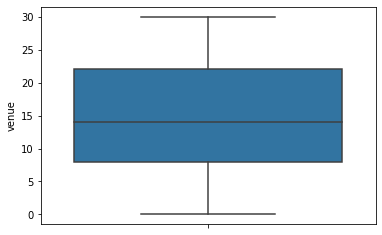

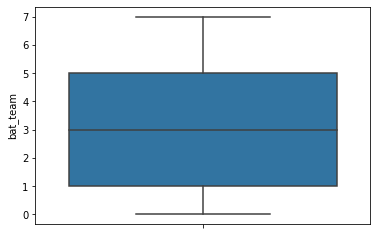

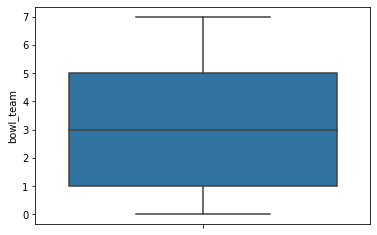

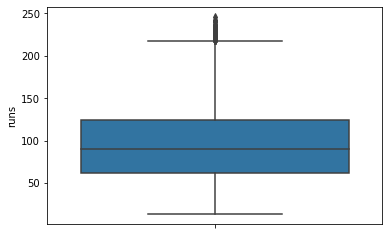

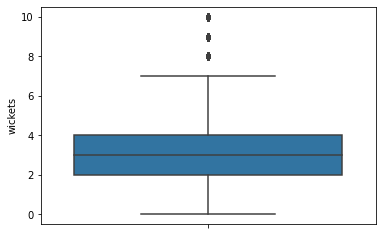

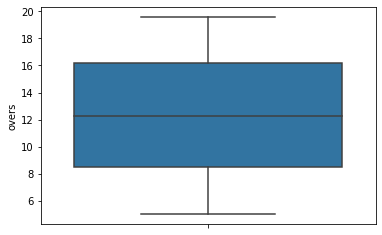

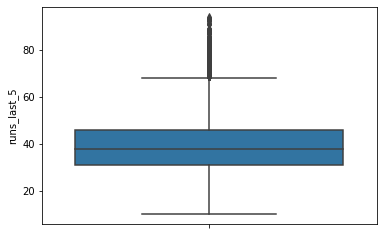

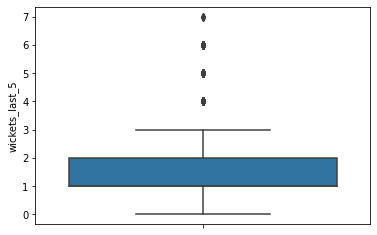

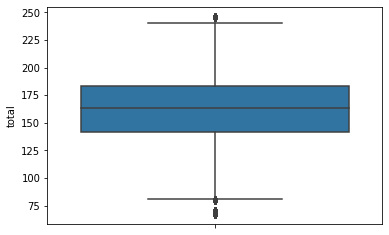

In [21]:
# Assumption 1: There should be no outliers in the data. Check using boxplot.
for i in df_numerical:
    sns.boxplot(data=df,y=df[i])
    plt.show()

In [ ]:
#Assumption 2:Assumption of Linearity:Every ind var should have a linear relationship with the dep var.
plt.figure(figsize=(30,15))
sns.pairplot(df,x_vars=df_numerical[3:-1],y_vars="total",
             kind='reg')
plt.show()

<Figure size 2160x1080 with 0 Axes>

In [23]:
df_numerical[0:-1]

['venue',
 'bat_team',
 'bowl_team',
 'runs',
 'wickets',
 'overs',
 'runs_last_5',
 'wickets_last_5']

In [24]:
X=df.iloc[:,0:-1]
Y=df['total']

<AxesSubplot:xlabel='total', ylabel='Density'>

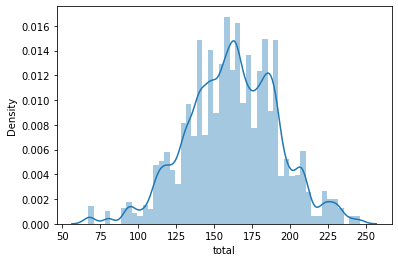

In [25]:
#Assumption of Normality: The dependent variable should follow an approximate normal distribtion
sns.distplot(Y,hist=True)

In [12]:
# # Log transformation
# import numpy as np
# Y_log  = np.log(Y)

<AxesSubplot:xlabel='total', ylabel='Density'>

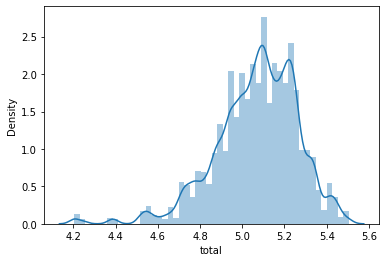

In [15]:
# sns.distplot(Y_log,hist=True)

array([[<AxesSubplot:title={'center':'runs'}>,
        <AxesSubplot:title={'center':'wickets'}>],
       [<AxesSubplot:title={'center':'overs'}>,
        <AxesSubplot:title={'center':'runs_last_5'}>],
       [<AxesSubplot:title={'center':'wickets_last_5'}>, <AxesSubplot:>]],
      dtype=object)

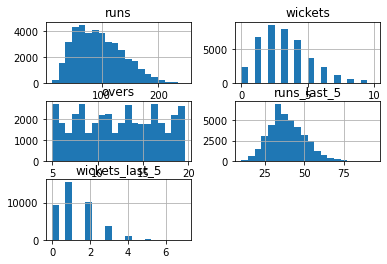

In [16]:
X.hist(bins=20)

In [17]:
from scipy.stats import skew
#finding the skewness in each variable
data_num_skew = X.apply(lambda i: skew(i.dropna()))
#subsetting the variables that are highly skewed
data_num_skewed = data_num_skew[(data_num_skew > .75) | (data_num_skew < -.75)]

print(data_num_skew)
print(data_num_skewed)
import numpy as np
# apply log + 1 transformation for all numeric features with skewness over .75
X[data_num_skewed.index] = np.log1p(X[data_num_skewed.index])

TypeError: unsupported operand type(s) for /: 'str' and 'int'